<div align="center">
    

# <font size="7"><font color="blue">LAB 02  -  COMMUNITY DETECTION</font>
    
</div>

---

<div align="center">

![](https://www.fit.hcmus.edu.vn/vn/images/logos/fit-logo-kem-truong.png)

</div>

---

## <font size="5"><font color="blue">I. Student Information and Self-evaluation</font>

<font color="red">This first part includes my general information and also my self-evaluation.</font>

---

<div align="center">

| Student ID | Fullname      | Responsibility                                                        | Evaluation rate (%) |
|------------|---------------|-----------------------------------------------------------------------|---------------------|
| 20127028   | V√µ VƒÉn Ho√†ng  | Explore at least 2 algorithms (20%)                                      | 100%                |
|            |               | Execute the code and running examples (20%)                            | 100%                |
|            |               | Search at least 2 large size datasets and implement the algorithms (20%)  | 100%                |
|            |               | Compare algorithms (10%)                                                   | 100%                |
|            |               | Full and detailed report of the implementation process, source code...(30%)| 100%                |
    
</div>

---

- To sum up, I have done this Lab 02 on time, although there are some difficulties when learning something new, I tried my best and finished all the tasks as completed as I can. 
- I think I can reach the objective of the lab: investigating and implementing community detection algorithms.
- Expected grade: 10.

---

## <font size="5"><font color="blue">II. Work presentation</font>  
    
<font color="red">This part contains the most important work of me in Lab 02 which consists of manual work and code work.</font>

---

<font size="5"><font color="blue">1. Introduction</font>


<font color="red">Before solving the requirements of Lab 02, I want to introduce some information about Community Detection field in general and also related library for further work.</font>

---

### <font color="blue">a. General information</font>

#### <font color="red">Why we need to explore Community Detection?</font>

We need to explore community detection because it plays an important role in our life and helps us alot in the bellowing fields examples:
- **The emergence of many Groups:** 

In today's society, many groups and organizations of various sizes, such as families, friends, coworkers, cities, and nations, are common. The spread of the internet has also resulted in the development of online communities. We may learn more about the forms and dynamics of these social groupings by investigating community detection or the research on the metabolic exchange processes within the network community of biological systems aims to understand the regulatory mechanisms of cells.


- **Study in various fields:** 

Social communities have been widely explored in subjects such as biology, computer science, technology, politics, and economics. Protein groups with comparable roles in cellular networks and discussion groups on related topics or issues on the World Wide Web are two examples. We may learn about the organization and interactions inside these networks by exploring community detection.


- **Practical Applications:** 

Community detection offers a wide range of applications. For example, clustering web clients with similar tastes and geographical closeness might improve internet service delivery. Identifying clusters of clients that have similar tastes can help in the development of successful recommendation systems. Clustering in large-scale graphs can improve data storage efficiency, whereas clustering nodes in transportation networks can improve traffic management.Moreover, the research on community detection for detecting the spread of diseases within communities, thereby developing methods to control various types of diseases, started in 2010 or even identify customer groups with similar interests in a product to provide reviews and enhance business efficiency.


- **Hierarchical Organization:** 

Many real-world social networks have hierarchical structures, with communities subdivided into sub-groups. This hierarchical order is visible in systems such as the human body, where organs are made up of tissues, which are made up of cells. Investigating community detection helps us to understand the hierarchical nature of social networks as well as the advantages of structuring systems through stable sub-components.


- **Graph Partitioning and Data Mining:** 

The discovery of communities is a popular problem in computer science, particularly in machine learning and data mining. Graph partitioning, which is part of community identification, is critical for activities like parallel computing, where task distribution to processors minimizes communication while increasing computational efficiency. In data mining tasks such as entity recognition, clustering, ranking, classification, link prediction, and subgraph discovery, community mining in social networks has immediate applications.

[Link Illustrative image about Community Detection](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*skhjgApyDIPbJNolIZCF5w.png)

<div align="center">

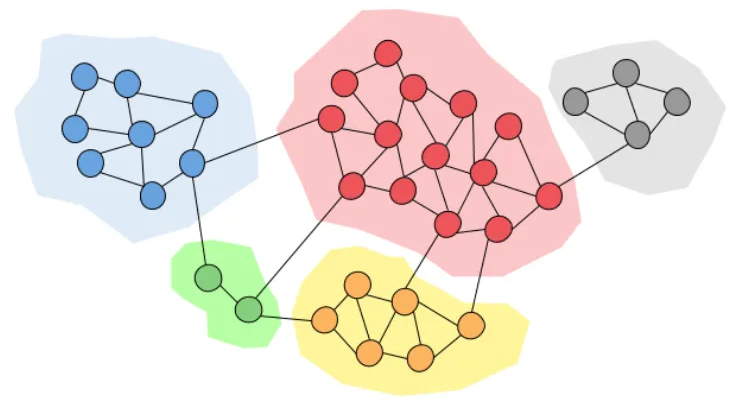
    
</div>

#### <font color="red">Overview of community detection algorithms</font>

In the year of 2010, [Professor Santo Fortunato](https://www.santofortunato.net/), School of Informatics and Computing, Indiana University, USA synthesized the community detection algorithms in typical method groups:
- Traditional methods
- Divisive algorithms (ph∆∞∆°ng ph√°p √°p d·ª•ng thu·∫≠t to√°n ph√¢n chia)
- Module-based methods
- Spectral-based algorithms
- Dynamic algorithms
- Statistical inference-based methods
- Overlapping community detection methods
- Multi-resolution and hierarchical clustering systems
- Dynamic community detection methods

Now we will concentrate more on **Divisive algorithms** (including Girvan-Newman Algorithm) and **Overlapping community detection methods** (including Clique Percolation algorithm). Let's move to next steps to make these algorithms clearer.

---

### <font color="blue">b. Necessary libraries</font>

- These libraries we studied alot in Lab 01 or also in the subjects: Introduction to Data Science, Data Visualization, so that I will move to another steps.

In [115]:
!pip install networkx
!pip install networkx matplotlib

In [116]:
import time
import numpy as np
import pandas as pd
import networkx as nx

In [117]:
from networkx.algorithms import community
from networkx.algorithms.community.quality import modularity
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.quality import partition_quality
from networkx.algorithms.community.kclique import k_clique_communities

---

<font size="5"><font color="blue">2. Requirement 1 & 2: Explore 2 of the algorithms & Execute code and running examples</font>

<font color="red">I am so excited about all 5 of algorithms, but I'm interested most in Girvan-Newman algorithm and Clique Percolation algorithm. Therefore, I am going to have a deep representation in these 2 algorithms.</font>

---

### <font color="blue">a. Algorithm 1: Girvan-Newman Algorithm</font>

#### <font color="red">Exploration</font>

- The Girvan-Newman method locates communities by gradually eliminating edges from the initial network.
- The algorithm can be represented in a dendrogram, where we can understand that the algorithm progresses from the root to the leaves. 
- The branches of the tree represent the edge removals to partition the graph into separate communities.

- Four major phases make up the Girvan-Newman algorithm:

**Step 1:** Determine the edge betweenness centrality for each edge in a graph (also apply BFS algorithm).

<font color="blue">With edge betweenness centrality can be calculated by the proportion between the number of shortest paths in the graph that pass through the node/edge and the total number of shortest path.</font>

**Step 2:** Remove the edge with the greatest betweenness centrality.

<font color="blue">If in case there are 2 edges with the same highest edge betweenness centrality, we can remove any one edge, or remove both edges at the same time (avoid removing edges when every community has only one component). Each component appears in only one community.</font>

**Step 3:** Determine each remaining edge's betweenness centrality again.

**Step 4:** Continue carrying out steps 2-4 up until all edges have been used.

[Link Illustrative image about Girvan-Newman Algorithm](https://miro.medium.com/v2/resize:fit:1248/1*ak3BbrzghPa_yO1cq_Fnww.jpeg)

<div align="center">
    
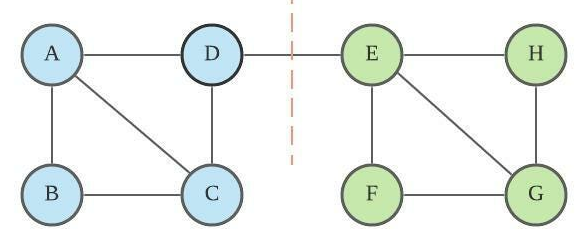

</div>

#### <font color="red">Basic example to make the algorithm clearer</font>

Given is a undirected graph, now we will apply Girvan-Newman algorithm step by step in order to locate communities 

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn13-4.fna.fbcdn.net/v/t1.15752-9/358380680_866536401470303_3523833321524027908_n.png?_nc_cat=110&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=ZpFH_V5MnXIAX8O9ihx&_nc_ht=scontent.fsgn13-4.fna&oh=03_AdSuOV4_VIlZeGVBK8vxtLbbgHTPD4dYC5BtbSmnBFeuIA&oe=64D0DC52)

</div>

**Step 1:** <font color="blue">We will determine the edge betweenness centrality for each edge in this graph (using BFS algorithm).</font>
- Ulrik Brandes - a German computer scientist had defined that the betweenness centrality of an edge e the total proportion of all-pairs shortest routes that travel via an edge e.
- Formula of ***edge betweenness centrality*** is that:
$$
C_{\text{edge}}(e) = \sum_{s, t  \in\ V} \frac{\sigma_{st}(e)}{\sigma_{st}}     (Note: s \neq t \neq e) 
$$
- In that formula: 

<div align="center">
    
| Sign                  |  Definition                                             |
|-----------------------|---------------------------------------------------------|
|  ùëâ                    | The group of nodes                                      |  
|  ùúéùë†ùë°                  | The number of shortest path from s to t                  | 
|   ùúéùë†ùë°(ùëí)               | The number of those shortest paths passing cross edge e | 
    
    
</div>

- Note that edge weights for weighted graphs need to be higher than zero because zero-edge weights can produce an endless number of equal length paths between pairs of nodes.
- Last but not least, in order to calculate the value of ***edge betweenness centrality*** we need to use the BFS algorithm.

#### <font color="grey">Edge betweenness centrality from Node A</font>

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn4-1.fna.fbcdn.net/v/t1.15752-9/359306039_264936246159595_4551093690299299116_n.png?_nc_cat=105&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=YYizyy49vnwAX-uMAar&_nc_ht=scontent.fsgn4-1.fna&oh=03_AdQzZUHZcJc119-48qTaTuxZMNK45elLghfarv9pZn-N4w&oe=64D0D355)

</div>

#### <font color="grey">Edge betweenness centrality from Node B</font>

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn13-3.fna.fbcdn.net/v/t1.15752-9/358701866_2849589165175308_8426559352789403876_n.png?_nc_cat=102&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=O7v8BB7HbpgAX8lLpVa&_nc_ht=scontent.fsgn13-3.fna&oh=03_AdRnKqAfhshu_aJoAhBQQmEAbYKqTo5HA9fuKsJx1NFMIg&oe=64D0E7B5)

</div>

#### <font color="grey">Edge betweenness centrality from Node C</font>

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn3-1.fna.fbcdn.net/v/t1.15752-9/358740430_281682691201201_7480647189369894990_n.png?_nc_cat=104&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=RtiTL_yM4s4AX-B82zz&_nc_ht=scontent.fsgn3-1.fna&oh=03_AdRZdFQbL1SHho-9o4IBI5hF3O7fG99h8GzaeXdwRNtI8w&oe=64D0C0B6)

</div>

#### <font color="grey">Edge betweenness centrality from Node D</font>

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn13-3.fna.fbcdn.net/v/t1.15752-9/359400045_2328206424033017_780357034549623025_n.png?_nc_cat=108&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=lyNn6HpM1FkAX8Lp5TM&_nc_ht=scontent.fsgn13-3.fna&oh=03_AdQBWErpwJbBD8bxlQEjP85sBFP9Lzf2vfP_eqlJFZQDTA&oe=64D0D461)

</div>

#### <font color="grey">Edge betweenness centrality from Node E</font>

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn8-2.fna.fbcdn.net/v/t1.15752-9/358994426_3509712212636737_7674229126932502535_n.png?_nc_cat=111&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=sMSxLEOD8ZcAX-xQ3pD&_nc_ht=scontent.fsgn8-2.fna&oh=03_AdS9SljoCI-2qul5xoGp-AOTDbLz3VJIah-9JPDO8KygPQ&oe=64D0ED7E)
    
</div>

- After knowing the edge betweenness centrality from all nodes (A, B, C, D, E), we will get the sum of them in 5 different center node and got that bellowing table:

<div align="center">

| Edge  |  Edge betweenness centrality          |
|-------|---------------------------------------|
|  AB   | 1.5 + 2.5 + 0.5 + 0.5 + 1.5 = **6.5** | 
|  AC   | 2.5 + 1.5 + 0.5 + 1.5 + 2.5 = **8.5** | 
|  CD   | 1.5 + 0.5 + 1.5 + 2.5 + 1.5 = **7.5** | 
|  DE   | 0.5 + 0.5 + 2.5 + 1.5 + 0.5 = **5.5** | 
|  BE   | 0.5 + 1.5 + 1.5 + 0.5 + 0.5 = **4.5** |
     
</div>

**Step 2:** <font color="blue">Remove the edge with the greatest betweenness centrality.</font>

- At the end of step 1, we can easily realize that edge **AC** has the biggest value of edge betweenness centrality, follow the theory, we will delete this edge and get the new graph:

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn4-1.fna.fbcdn.net/v/t1.15752-9/359442984_276572191730749_7309429599978658685_n.png?_nc_cat=105&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=vbJkTEgGI5YAX-5aUCX&_nc_ht=scontent.fsgn4-1.fna&oh=03_AdTmoEunbHyODnPIk2FM6LHwlwa8ek7dielhagbD2X51jA&oe=64D0E2EE)

</div>

**Step 3:** <font color="blue">Determine each remaining edge's betweenness centrality again (using BFS algorithm).</font>

#### <font color="grey">Edge betweenness centrality from Node A</font>

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn13-4.fna.fbcdn.net/v/t1.15752-9/358501307_227467306878632_5689367160069217333_n.png?_nc_cat=107&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=E85rQ5DPOVgAX9Xnt8v&_nc_ht=scontent.fsgn13-4.fna&oh=03_AdSFpcTvY6ZXibow1xd__ukaTfzUNVU9UZupsTq6XQHMVQ&oe=64D0EA0E)
    
</div>

#### <font color="grey">Edge betweenness centrality from Node B</font>

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn13-2.fna.fbcdn.net/v/t1.15752-9/359537938_758533969356536_3080154822017553514_n.png?_nc_cat=109&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=SMb5gLdykq8AX8P0ybY&_nc_ht=scontent.fsgn13-2.fna&oh=03_AdSxydbyYGEhXbFpuRhoe4hX9JiXFuD_p_SxTceOple_oA&oe=64D0EAB0)

</div>


#### <font color="grey">Edge betweenness centrality from Node C</font>

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn13-2.fna.fbcdn.net/v/t1.15752-9/358742684_223287490664020_6533484502219344768_n.png?_nc_cat=106&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=zaIaAJQEIRwAX9VN1UH&_nc_ht=scontent.fsgn13-2.fna&oh=03_AdQ7ownoxT22MFO8VW2yGUWymQDxqOTjLtrJnjZh8Namog&oe=64D0EADF)    

</div>

#### <font color="grey">Edge betweenness centrality from Node D</font>

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn4-1.fna.fbcdn.net/v/t1.15752-9/359561121_6236157176421613_6771057635344982163_n.png?_nc_cat=101&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=ZnBTp3W_kQ0AX_UxOEw&_nc_ht=scontent.fsgn4-1.fna&oh=03_AdRb8fFPm0mrUbLmq_LOD6zVmgUhfjHMYGINeJE4goE5tg&oe=64D0DEE9)

</div>

#### <font color="grey">Edge betweenness centrality from Node E</font>

<div align="center">    
    
![Image drawn by me using draw.io](https://scontent.fsgn13-2.fna.fbcdn.net/v/t1.15752-9/359384794_1689274544922238_2188657136291938204_n.png?_nc_cat=109&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=OvGPMIs45qMAX_MwzTt&_nc_ht=scontent.fsgn13-2.fna&oh=03_AdQr1FV-cZXafDcep9RtWYyf1qfM0lIskkMHz0_8opZPGA&oe=64D0E1C3)

</div>

- Similar to step 1, we get that edge betweenness centrality table:

<div align="center">

| Edge  |  Edge betweenness centrality          |
|-------|---------------------------------------|
|  AB   | 4 + 1 + 1 + 1 + 1 = **8** |  
|  CD   | 1 + 1 + 1 + 1 + 4 = **8** | 
|  DE   | 2 + 2 + 2 + 3 + 3 = **12** | 
|  BE   | 3 + 3 + 2 + 2 + 2 = **12** |
     
</div>

**Step 4:** <font color="blue">Continue carrying out steps 2-4 up until all edges have been used.

- <font color="red">As we can see from the table above, value of edge betweeness centrality of DE and BE are the highest. As we know if in case there are 2 edges with the same highest edge betweenness centrality, we can remove any one edge, or remove both edges at the same time.</font>

#### <font color="grey">If we remove edge BE, we can create 2 communities: </font>
    - Community 1 includes: A, B vertice 
    - Community 2 includes: C, D, E vertice 

<div align="center">    
    
![Image drawn by me using draw.io](https://scontent.fsgn13-3.fna.fbcdn.net/v/t1.15752-9/359677911_1574184803107925_227124564364502787_n.png?_nc_cat=102&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=kbTbNC0X7mQAX_s8CVA&_nc_ht=scontent.fsgn13-3.fna&oh=03_AdS5vhS--KMis6Z1lQaTUFK3tP8s9-yjpUQFKfG0nxOFRQ&oe=64D1E6CD)

</div>

#### <font color="grey">If we remove edge DE, we can create 2 communities: </font>
    - Community 1 includes: A, B, E vertice
    - Community 2 includes: C, D vertice 

<div align="center">    
    
![Image drawn by me using draw.io](https://scontent.fsgn13-2.fna.fbcdn.net/v/t1.15752-9/355814932_962997958341526_4332808718329076337_n.png?_nc_cat=109&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=NbsTImeN0O0AX-77SFQ&_nc_ht=scontent.fsgn13-2.fna&oh=03_AdRURrEDIKqVEguF6x0XvjRrG58YkHkO4M--yUnN4PpC3w&oe=64D1D00A)

</div>

#### <font color="grey">If we remove both edges: BE and DE, we can create 3 communities: </font>
    - Community 1 includes: A, B vertice
    - Community 2 includes: C, D vertice 
    - Community E includes: E vertice.

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn4-1.fna.fbcdn.net/v/t1.15752-9/359492282_960636595194336_408310512684165238_n.png?_nc_cat=103&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=r5tEoKmep24AX9Itfiv&_nc_ht=scontent.fsgn4-1.fna&oh=03_AdRnMV_sxN_COpA1zI62InTe6CV5q_NJAAbIYmfS8Cp9gw&oe=64D0F57D)

</div>

- The algorithm stops.
- The result can be 1 in these 3 results above. It is depend on the choice and target of users.

#### <font color="red">Advantages</font>

- **Advantage 1:** Unsupervised method: indicating that no previous knowledge nor tagged data are necessary. Based purely on the connectivity patterns of the network, it can automatically find communities there.
- **Advantage 2:** Widely used in academic fields: it has received a lot of attention and use, numerous research studies and real-world applications have shown how useful and reliable it is.

#### <font color="red">Disadvantages</font>

- The Girvan-Newman algorithm gives relatively good results in many cases, but it has three main disadvantages:

**Disadvantages 1:** The Girvan-Newman algorithm does not determine the number of communities in advance, and when a network is partitioned, there can be numerous possible divisions. With a large number of partitions, it becomes difficult to determine which partitioning yields the best effectiveness.

**Disadvantages 2:** The algorithm has a high time complexity, which is dependent on the total number of edges to be removed. With a time complexity of ***O(mn)*** in each iteration, the total computational time can be expressed as ***O(m<sup>2</sup>n)*** or in the worst-case scenario, it can be ***O(n<sup>3</sup>)***.

**Disadvantages 3:** The Girvan-Newman algorithm does not address the issue of overlapping communities, where a vertex can belong to multiple communities within a network. For example, an individual A, playing the role of a node in a social network, can belong to multiple groups: classmates, colleagues at work, cousins within the family, and so on.

#### <font color="red">Practical example using Girvan-Newman Algorithm</font>

[Link Image of the collaborative network model of scientists at SFI](https://sfi-edu.s3.amazonaws.com/sfi-edu/production/uploads/sfi-com/dev/uploads/filer/60/17/6017b3fe-6030-452c-b9c2-94f38b9273e6/01-12-077.pdf?fbclid=IwAR3qrmEIVwPZ_wOAt_iWidFdKaLU5OTjEfiXR61-cbN6CKFNgy-VE8vY4ek)

<div align="center">
    
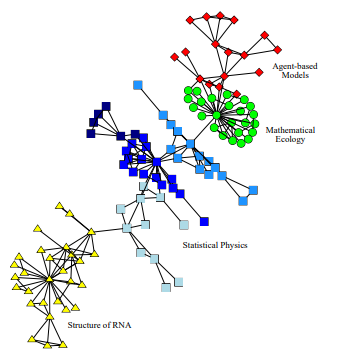
    
</div>

- It is a practical example of using Girvan-Newman algorithm that describes a component with the largest size in the collaborative network model of scientists working at the Santa Fe Institute (SFI). 

- It consists of a total of 118 vertices, representing the scientists at the institute and their collaborators. An edge is placed between two vertices if the two scientists represented by those vertices have co-authored a paper together. 

- In this network, we observe numerous cliques, with each clique representing all the authors of a paper. 

- On the other hand, we also notice the existence of only a few connections between most of the communities in the network. 

- The vertices of the same color are the result of the analysis and community detection using the Girvan-Newman algorithm, which is also similar to the division based on the research fields at the institute.

- It can help identify key researchers who play central roles in connecting different subgroups, reveal patterns of collaboration and knowledge sharing, and potentially uncover interdisciplinary collaborations between different research areas within the institute. 

- Understanding the structure and characteristics of the largest component can contribute to the study of scientific collaboration dynamics, research impact, and the overall network resilience and efficiency in knowledge dissemination at the Santa Fe Institute.

#### <font color="red">Execute code and running examples</font>

- <font color="blue">In order to be easy to follow and check the result, we will continue using the graph of 5 vertices (A,B, C, D, E) above to apply code.</font>

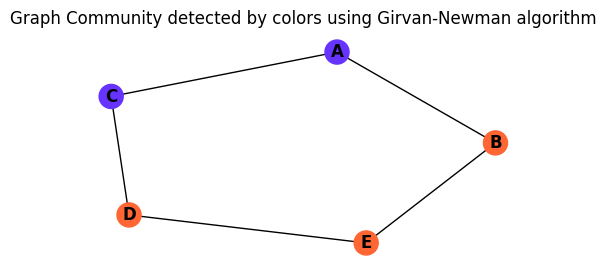

- The number of communities locating in the graph: 2
- Name of component(s) in each community:  [['A', 'C'], ['E', 'B', 'D']]


In [118]:
G = nx.Graph() # creates empty graph 
G.add_nodes_from(['A', 'B', 'C', 'D', 'E']) # add new nodes
G.add_edges_from([('A', 'B'), ('B', 'E'), ('E', 'D'), ('C', 'D'), ('A', 'C')]) # add new edges
communities = girvan_newman(G) # use Girvan-Newman algorithm 
found_community = [] # create list to save the created communities
for community in next(communities): #  loop through communities
    found_community.append(list(community)) # convert community into list and add to found_community
graph_name = 'Graph Community detected by colors using Girvan-Newman algorithm'
color_split = []
for node in G:
    if node in found_community[0]:
        color_split.append('#6633FF') # color of first community
    else:
        color_split.append('#FF6633') # color of second community
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title(graph_name)
nx.draw(G, node_color=color_split, with_labels=True,
        node_size=300, font_weight="bold",
        font_color="#000000", font_size=12, ax=ax)
plt.show() # show the plot
print("- The number of communities locating in the graph:", len(found_community))
print('- Name of component(s) in each community: ', found_community)

#### <font color="red">Comments</font>
- In conclusion, after executing code and running this example, we can find out that there is the same result in both solving by hand and code. This can be a good, beliable evidence to make sure that the research and work of me for Girvan-Newman Algorithm is correct.

---

### <font color="blue">b. Algorithm 2: Clique Percolation Algorithm</font>

#### <font color="red">Exploration</font>

- The Clique Percolation Algorithm was proposed by Palla et al. in 2005. 
- The authors extended the issues addressed by Girvan-Newman by identifying overlapping communities, where a vertex can belong to one or multiple communities.
- The idea of the algorithm is that each community is formed by Cliques, and the initial graph contains a large number of Cliques. And the concept of a k-clique graph is used to denote a complete graph with k vertices. Two adjacent k-clique graphs share (k-1) vertices in common.

- **Input:** Graph G with N vertices, Clique graph with k vertices.
- **Output:** Community structure.

- Four major phases make up the Clique Percolation algorithm:

**Step 1:** Find all k-clique graphs in graph G.

**Step 2:** Then create graph where nodes are cliques of size k

**Step 3:** Add edges if two nodes (cliques) share k-1 common nodes

**Step 4:** Each connected component is a community

[Link Illustrative image about Clique Percolation Algorithm (k-clique communities at k = 4)](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Illustration_of_overlapping_communities.svg/800px-Illustration_of_overlapping_communities.svg.png)

<div align="center">

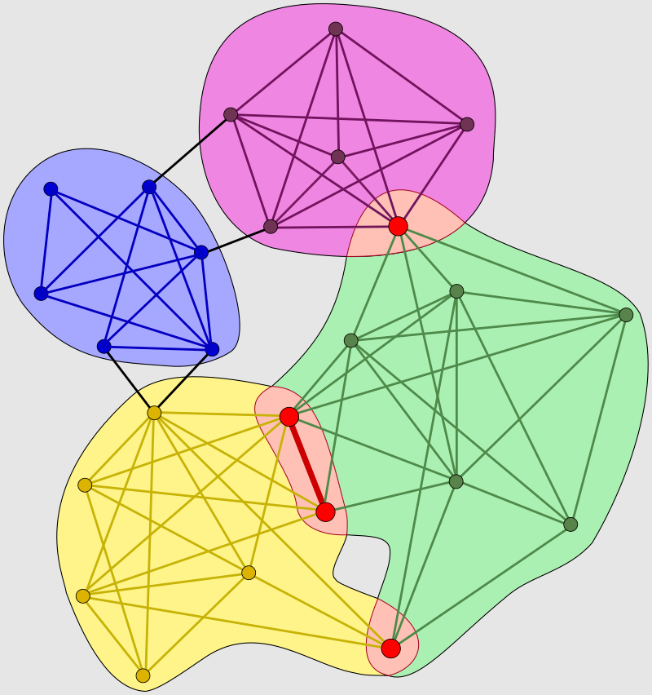

</div>

#### <font color="red">Basic example to make the algorithm clearer</font>

- Apply the Clique Percolation Algorithm to determine community of this bellowing picture

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn13-4.fna.fbcdn.net/v/t1.15752-9/359544050_2574129002734108_1631406142002823572_n.png?_nc_cat=110&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=Z-xFooWTyDwAX-olRIy&_nc_ht=scontent.fsgn13-4.fna&oh=03_AdQkT-QDP-K6jaRji-TjyNHhRMeBDndsqLR7bMLYB5ulHQ&oe=64D200F8)

</div>

**Step 1:** <font color="blue">Find all cliques in the graph.

- From this initial graph, with the value of k we choose is k = 3, we can find out 4 cliques: **(A, B, C)**, **(D, E, F)**, **(G, H, I)**, **(C, G, H)**, like the picture I draw bellow:

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn4-1.fna.fbcdn.net/v/t1.15752-9/355966322_824012099306207_6132337570712505105_n.png?_nc_cat=105&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=7f03SXp62rIAX_6dhZr&_nc_ht=scontent.fsgn4-1.fna&oh=03_AdThpsg16u0EfRF1ArLhNkUQxJArS_l7AlDkZW4EWRBYLw&oe=64D2B17A)

</div>

**Step 2:** <font color="blue">Then create graph where nodes are cliques of size k

- After knowing the components in each cliques, we will convert each clique into a new node as the image I did:

#### <font color="grey">Clique 1(A, B, C): X</font>

#### <font color="grey">Clique 2(D, E, F): Y</font>

#### <font color="grey">Clique 3(G, H, I): Z</font>

#### <font color="grey">Clique 4(C, G, H): T</font>

<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn3-1.fna.fbcdn.net/v/t1.15752-9/356042084_975330473660547_6162562490820787444_n.png?_nc_cat=104&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=e2QJjech63YAX8s7_Ps&_nc_ht=scontent.fsgn3-1.fna&oh=03_AdSOlkFyDk_r54p70-dCkQTBuYb5kILBmMB5u1xuOCtAEw&oe=64D2E5F1)

</div>

**Step 3:** <font color="blue">Add edges if two nodes (cliques) share k-1 common nodes


- Because we decide the value of k is 3 at the beginning, so in this step we need to find (k - 1) = 2 common nodes among the cliques if we want to add an edge.
- We can easily observe that Clique 3(G, H, I): Z and Clique 4(C, G, H) have 2 common nodes: G and H. Therefore, there will be an edge between T & Z (such as the bellowing picture).


<div align="center">
    
![Image drawn by me using draw.io](https://scontent.fsgn13-4.fna.fbcdn.net/v/t1.15752-9/355968647_2347193658775203_6943700605125202260_n.png?_nc_cat=107&cb=99be929b-59f725be&ccb=1-7&_nc_sid=ae9488&_nc_ohc=Sucq16pbAWMAX-59w-P&_nc_oc=AQm6G9M3CQI_2mPHsPRD4VH7B_eborJr7iey6jTiq5a9eNHcMjRL7UDdaGimq4_mskc&_nc_ht=scontent.fsgn13-4.fna&oh=03_AdRJ8EGiMtDksJWNOuGdi3lwOXw_xXHE9zVVL_HYLO9JSQ&oe=64D2CDDC)

</div>

**Step 4:** <font color="blue">Each connected component is a community

- Finally, all the node in T and Z clique establish an community including: H, G, C, I.
- The algorithm finishes.

#### <font color="red">Advantages</font>

- **Advantage 1:** Finding communities that overlap: The method may find communities that cross over, allowing nodes to concurrently belong to many communities.

- **Advantage 2:** Robust the noise: The method can extract important community structures from noisy or partial data.

- **Advantage 3:** Flexible in community zize: The algorithm is capable of detecting communities of a range of sizes rather than only those of a certain size.

#### <font color="red">Disadvantages</font>

- **Disadvantage 1:** The performance of this algorithm can be affected by the selection of parameters, such as the clique size, and may call for careful adjustment for the best outcomes.
- **Disadvantage 2:** High computational Complexity: The approach is computationally costly for large-scale networks since the time complexity grows exponentially with the size of the graph and the desired community size.

#### <font color="red">Practical example using Clique Percolation Algorithm</font>

[Link Image of the interactions between proteins in cancerous cells of a rat. Communities, labeled by colors, were detected with the Clique Percolation Method by Palla et al.](https://www.researchgate.net/publication/1903620_Community_Structure_in_Graphs/download)


<div align="center">
    
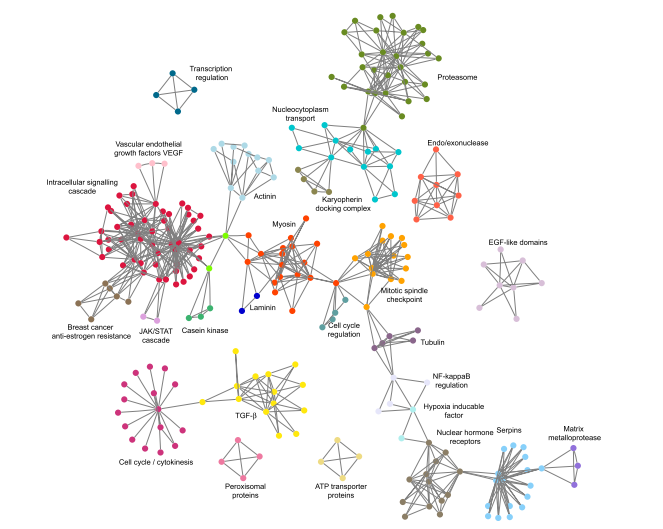
    
</div>

- This is the community structure in protein‚Äìprotein interaction networks. The graph pictures the interactions between proteins in cancerous cells of a rat. Communities, labeled by colors, were detected with the Clique Percolation Method by Palla et al. 
- Analyzing the community structure can provide insights into the organization and functional relationships of proteins in the cancerous cells, aiding in understanding disease mechanisms and identifying potential therapeutic targets.


#### <font color="red">Execute code and running examples</font>

- <font color="blue">Implementation</font>

In [119]:
def display_all_cliques(G1, k): # generate all cliques in graph
    cliques = list(nx.enumerate_all_cliques(G1))
    cliques_k = [clique for clique in cliques if len(clique) == k]  # storing cliques in cliques_k .
    print(f"All Cliques with k = {k}:")
    if len(cliques_k) == 0:
        print(f"There is no cliques with that value of k.")
    else:
        for i, clique in enumerate(cliques_k):
            print(f"Clique {i+1}: {clique}")    
    return cliques_k

In [120]:
def establish_communities(cliques, k): # establish communities
    communities = []    
    for i, clique1 in enumerate(cliques):
        for j, clique2 in enumerate(cliques[i+1:], start=i+1):
            common = set(clique1).intersection(clique2) # take union of nodes from cliques
            if len(common) >= (k - 1):
                community = set(clique1).union(clique2)
                if community not in communities:
                    communities.append(community)  # append if not comfort condition  
    return communities

- <font color="blue">In order to be easy to follow and check the result, we will continue using the graph of 9 vertices (A,B, C, D, E, F, G, H, I) above to apply code.</font>

All Cliques with k = 3:
Clique 1: ['A', 'B', 'C']
Clique 2: ['C', 'G', 'H']
Clique 3: ['D', 'E', 'F']
Clique 4: ['G', 'H', 'I']
Established Communities include:
Community 1: {'I', 'G', 'H', 'C'}


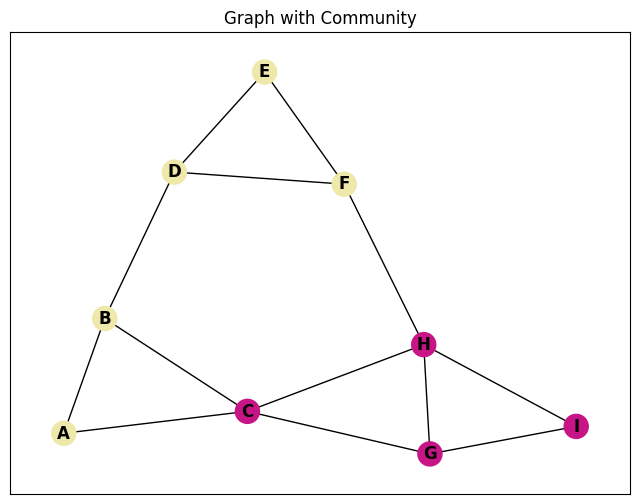

In [121]:
G1 = nx.Graph() # create graph (the same with the basic example in previous part)
G1.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
G1.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'), ('E', 'F'),
                   ('D', 'F'), ('G', 'H'), ('H', 'I'), ('G', 'I'), ('B', 'D'),
                   ('C', 'G'), ('F', 'H'), ('C', 'H')])
k = 3 # choose value of k
cliques_k = display_all_cliques(G1, k) # show cliques with k 
if len(cliques_k) == 0: # check if there are cliques with k or not
    print("There is no cliques with that value of k.")
else:
    communities = establish_communities(cliques_k, k) # establish communities

    if len(communities) == 0:     # check if there are communities or not
        print("There is no communities established.")
    else:        
        print("Established Communities include:") # display communities
        for i, community in enumerate(communities):
            print(f"Community {i+1}: {community}")       
        color_map = {}
        # create color nodes for each community
        color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#FFA500', '#800080']
        for i, community in enumerate(communities):
            color_map.update({node: color_list[i] for node in community})
        common_nodes = set.intersection(*communities)
        color_map.update({node: '#C71585' for node in common_nodes}) # color for common node among cliques

        node_colors = [color_map.get(node, '#EEE8AA') for node in G1.nodes] # color community nodes
        edge_colors = ["black" if G1.has_edge(u, v) else "lightblue" for u, v in G1.edges]

        plt.figure(figsize=(8, 6))
        ax = plt.gca()
        nx.draw_networkx(G1, node_color=node_colors, edge_color=edge_colors,
                         with_labels=True, node_size=300, font_weight="bold",
                         font_color="#000000", font_size=12, ax=ax)
        plt.title("Graph with Community")
        plt.show()

#### <font color="red">Comments</font>

- Affter executing the code and running the example, we can observe that the results obtained from both manual work of mine and the code implementation are identical. 
- This outcome serves as strong and reliable evidence, indicating the correctness of the research and work I conducted on the Clique Percolation Algorithm.

---

<font size="5"><font color="blue">3. Requirement 3: Search 2 large size datasets, implement algorithms on these datasets</font>

<font color="red">Find 2 large size datasets (from several hundred vertices) related to real world network data.</font>

---

### <font color="blue">a. Describe something about 2 large size datasets</font>

- The data sets are in GML format. For a description of GML see here. GML can be read by many network analysis packages, including Gephi and Cytoscape, other file is csv - it is so friendly for us.
- All of these are free for scientific use to the best of my knowledge, meaning that the original authors have already made the data freely available, or that I have consulted the authors and received permission.

#### <font color="red">Dataset 1: Organization Using Online Social Networks</font>
- [This organization](https://data4goodlab.github.io/dataset.html) used their organization social network crawler, they collected data from six companies on three different scales: Small (S), Medium (M), and Large (L) scale companies currently employing 500 to 2,000, 4,000 to 20,000, and more than 50,000 employees, respectively. 
- The data organizations' datasets were collected form the organizations' employees Facebook pages. More details on each organization can be found in the paper "Organization Mining using Online Social Networks".
- Year: 2013
- Node Number: from 500 to 50,000 (I choose file with Small (S) scale to save time).
- Community detection in this dataset can reveal clusters of employees who frequently interact with each other within the organization or help identify individuals who act as influencers or opinion leaders within the organization. 

Number of nodes: 320
Number of edges: 2369


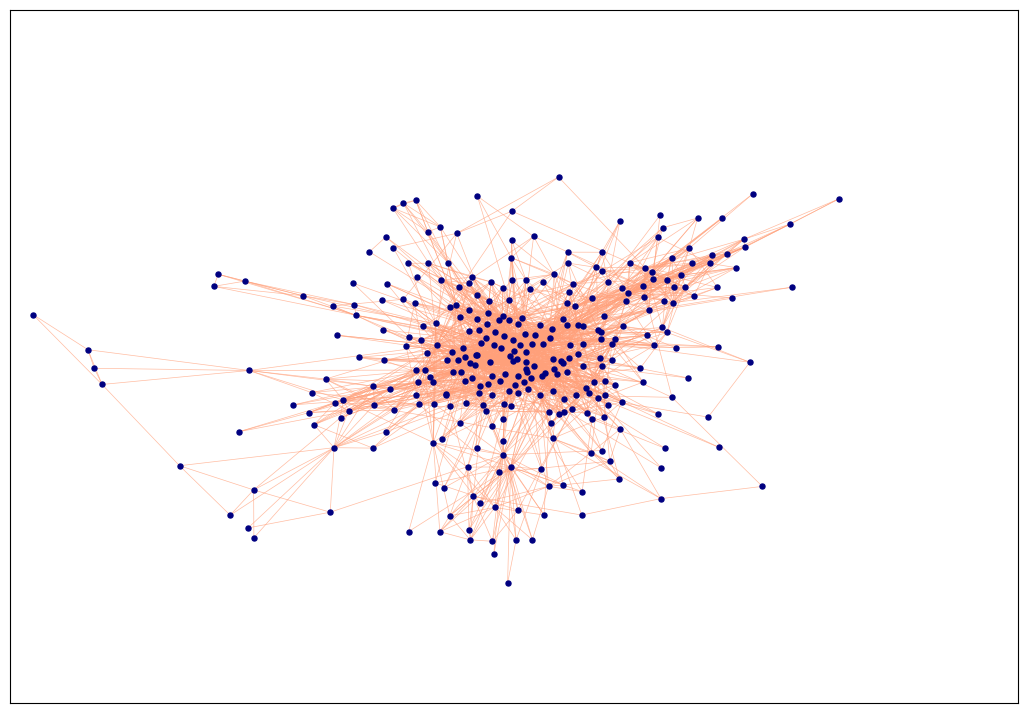

In [122]:
G2 = nx.read_edgelist("S1Anonymized.csv", delimiter=',', nodetype=int)
num_nodes = G2.number_of_nodes()
num_edges = G2.number_of_edges()
pos = nx.spring_layout(G2, scale=1.05)
fig, ax = plt.subplots(figsize=(13, 9))
nx.draw_networkx_nodes(G2, pos, node_size=13, node_color='#000080', ax=ax)
nx.draw_networkx_edges(G2, pos, width=0.5, alpha=0.7, edge_color='#FFA07A', ax=ax)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xticks([])
ax.set_yticks([])
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
plt.show()

#### <font color="red">Dataset 2: Coauthorships in network science</font>

- [Link to get datadet 2: Coauthorships in network science](http://www-personal.umich.edu/~mejn/netdata/)
- This graph dataset is about the coauthorship network of scientists working on network theory and experiment.
- It was compiled by M. Newman in May 2006
- The network was compiled from the bibliographies of two review articles on networks, M. E. J. Newman, SIAM Review 45, 167-256 (2003) and S. Boccaletti et al., Physics Reports 424, 175-308 (2006), with a few additional references added by hand.  
- The version given here contains allcomponents of the network, for a total of 1589 scientists, and not just the largest component of 379 scientists previously published.  
- Apllying community detection in this dataset can identify the interdepartmental relationships, identify individuals who act as influencers or opinion leaders within the organization or even give us some targeted communication and team building.

Number of nodes: 1589
Number of edges: 2742


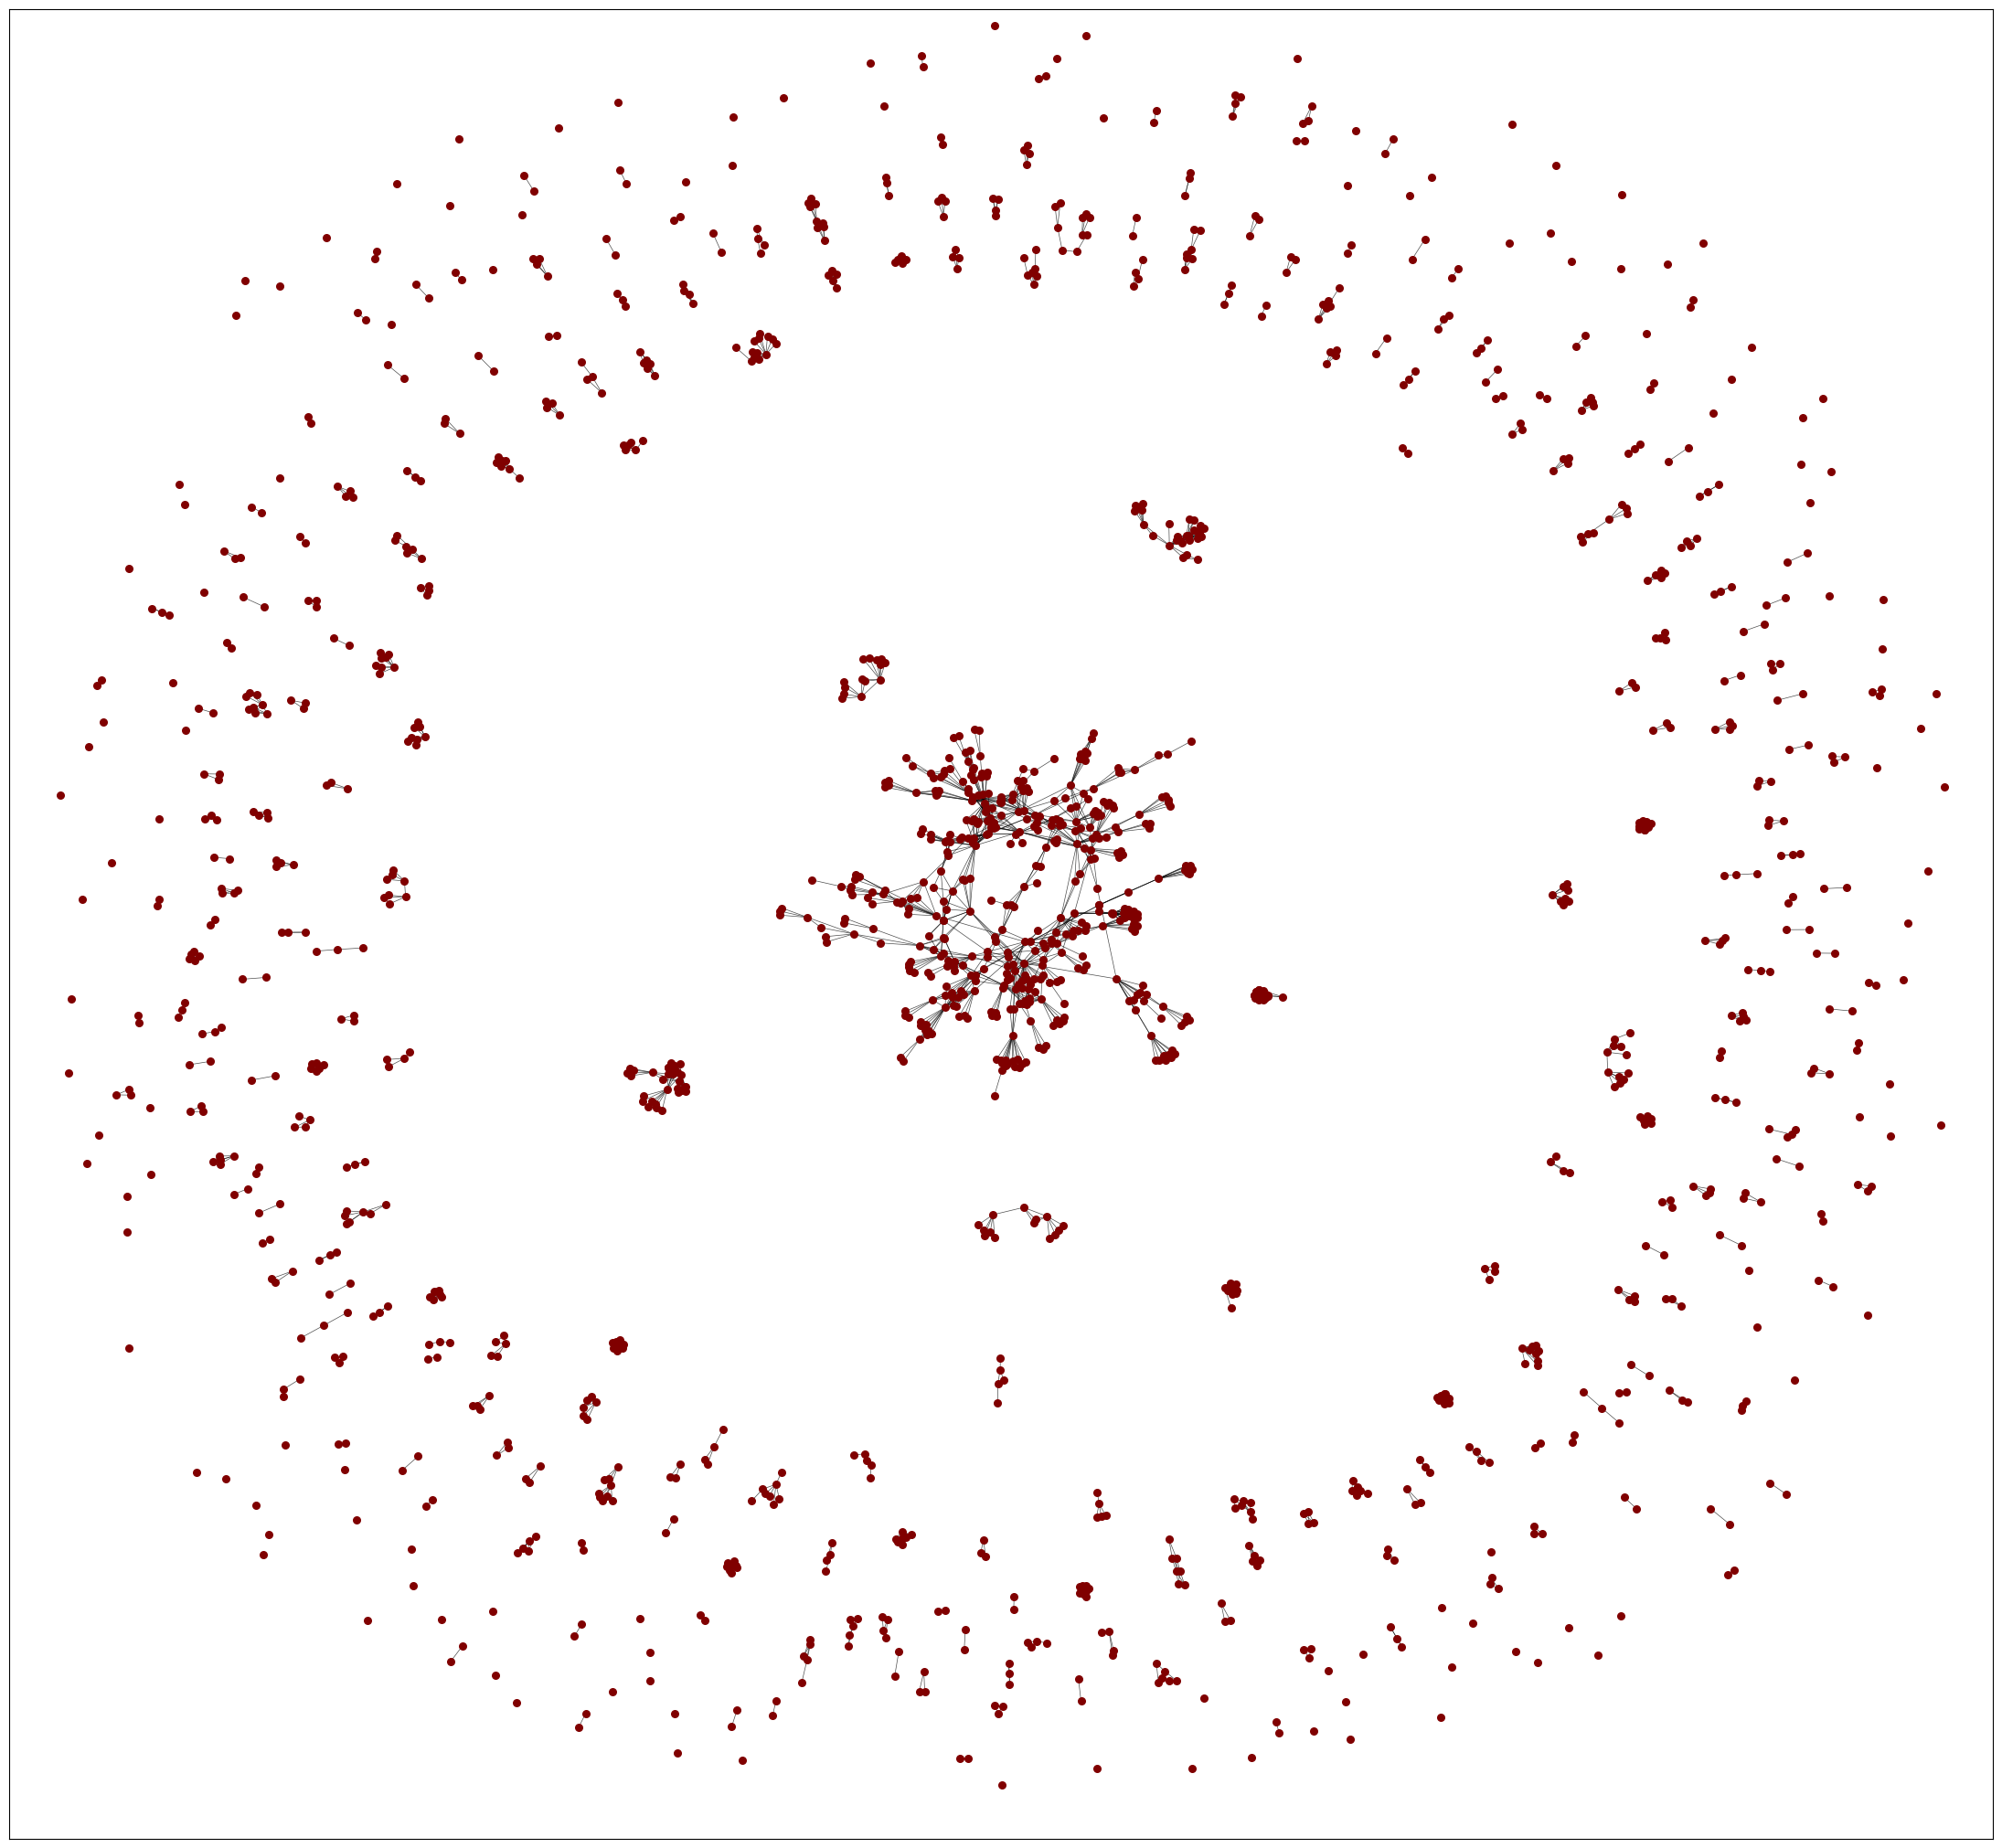

In [123]:
G3 = nx.read_gml('netscience.gml')
num_nodes = G3.number_of_nodes()
num_edges = G3.number_of_edges()
pos = nx.spring_layout(G3, scale=1.08)
fig, ax = plt.subplots(figsize=(28, 26))
nx.draw_networkx_nodes(G3, pos, node_size= 30, node_color='#800000', ax=ax)
nx.draw_networkx_edges(G3, pos, width = 0.5, alpha = 0.7, edge_color='#000000', ax=ax)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xticks([])
ax.set_yticks([])
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
plt.show()

### <font color="blue">b. Apply with Girvan-Newman Algorithm</font>

#### <font color="red">Dataset 1: Organization Using Online Social Networks</font>

In [124]:
start_time = time.time()
communities = girvan_newman(G2)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
num_communities = len(node_groups)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time G2 using Girvan-Newman Algorithm:", execution_time, "seconds")
print("The number of communities in G2 is:", num_communities)
for i, nodes in enumerate(node_groups):
    print(f"Community {i+1}: {nodes}")

Execution time G2 using Girvan-Newman Algorithm: 3.365880012512207 seconds
The number of communities in G2 is: 2
Community 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201,

#### <font color="red">Dataset 2: Coauthorships in network science</font>

In [125]:
start_time = time.time()
communities = girvan_newman(G3)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
num_communities = len(node_groups)    
end_time = time.time()
execution_time = end_time - start_time
print("Execution time G3 using Girvan-Newman Algorithm:", execution_time, "seconds")    
print("- The number of Communities in G3 is:", num_communities)
for i, nodes in enumerate(node_groups):
    print(f"Community {i+1}: {nodes}")

Execution time G3 using Girvan-Newman Algorithm: 11.246114253997803 seconds
- The number of Communities in G3 is: 397
Community 1: ['KUPERMAN, M', 'MORELLI, L', 'ZANETTE, D', 'ABRAMSON, G']
Community 2: ['RITORT, F', 'PEREZVICENTE, C', 'BONILLA, L', 'SPIGLER, R', 'ACEBRON, J']
Community 3: ['PUNIYANI, A', 'WILKINSON, D', 'ADAR, E', 'TYLER, J', 'WU, F', 'ADAMIC, L', 'HUBERMAN, B', 'LUKOSE, R']
Community 4: ['PALM, G', 'KUBO, M', 'AERTSEN, A', 'HABIB, M', 'HEHL, U', 'DIESMANN, M', 'MEHRING, C', 'GERSTEIN, G']
Community 5: ['VERICHEV, N', 'AFRAIMOVICH, V', 'RABINOVICH, M']
Community 6: ['AGRAWAL, H']
Community 7: ['AHUJA, R', 'MAGNANTI, T', 'ORLIN, J']
Community 8: ['LU, L', 'DEWEY, T', 'CHUNG, F', 'VU, V', 'GALAS, D', 'AIELLO, W', 'BHAN, A']
Community 9: ['ALBA, R']
Community 10: ['MIROJULIA, J', 'ROSSELLO, F', 'ALBERICH, R']
Community 11: ['KIM, D', 'HOLYST, J', 'SCHUBERT, A', 'WUCHTY, S', 'STAGNI, C', 'SHOCHET, O', 'MOORE, C', 'CARUSO, F', 'TIERI, P', 'MASLOV, S', 'SZABO, G', 'KINNEY, 

### <font color="blue">c. Apply with Clique Percolation Algorithm</font>

#### <font color="red">Dataset 1: Organization Using Online Social Networks</font>

In [126]:
start_time = time.time()
communities = list(nx.community.k_clique_communities(G2, 3)) 
components2 = [list(x) for x in communities] 
end_time = time.time()
execution_time = end_time - start_time
print("Execution time G2 using Clique Percolation Algorithm:", execution_time, "seconds")
print("The number of communities in G2 using Clique Percolation Algorithm with k = 3 is: ", len(communities))
print("Components in each community: ", components2)

Execution time G2 using Clique Percolation Algorithm: 0.5440254211425781 seconds
The number of communities in G2 using Clique Percolation Algorithm with k = 3 is:  2
Components in each community:  [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 1

#### <font color="red">Dataset 2: Coauthorships in network science</font>

In [127]:
start_time = time.time()
G3 = nx.read_gml('netscience.gml', label='id')
communities = list(nx.community.k_clique_communities(G3, 3)) 
components3 = [list(x) for x in communities] 
end_time = time.time()
execution_time = end_time - start_time
print("Execution time G3 using Clique Percolation Algorithm:", execution_time, "seconds")
print("The number of communities in G3 using Clique Percolation Algorithm with k = 3 is: ", len(communities))
print("Components in each community: ", components3)

Execution time G3 using Clique Percolation Algorithm: 0.1875288486480713 seconds
The number of communities in G3 using Clique Percolation Algorithm with k = 3 is:  260
Components in each community:  [[0, 1, 1084], [2, 3, 4, 5, 6], [9, 10, 11, 7], [1424, 9, 1425], [1047, 1048, 1049, 1050, 12], [12, 13, 14, 15], [16, 17, 18], [20, 21, 22], [200, 201, 202, 369, 23, 24, 25], [27, 28, 29], [32, 30, 31], [131, 132, 133, 134, 839, 840, 1228, 1229, 1550, 1551, 30, 33, 34, 1190, 1191, 488, 489, 1008, 561, 562, 51, 52, 53, 54, 1529], [33, 1295, 1263, 375, 376, 377, 378], [33, 507, 508, 509, 190], [35, 36, 37, 38, 39, 40], [44, 45, 46], [609, 610, 611, 612, 45], [1361, 1362, 428, 46], [192, 193, 194, 46, 191], [48, 49, 50, 47], [1282, 1283, 516, 473, 1041, 788, 343, 216, 217, 218, 219, 220, 221, 222, 345, 224, 346, 347, 1560, 1561, 48, 1394, 1395, 1396, 1397, 697, 1145, 251, 252], [774, 652, 653, 654, 655, 656, 657, 184, 865, 34, 547, 934, 1130, 51, 1461, 55, 56, 893], [57, 58, 51], [59, 60, 61],

### <font color="blue">d. Summarize results</font>

- **Dataset 1**

<div align="center">
    
| Name of applying algorithm  |  Execution time (second)      | Number of communities |
|-------|---------------------------------------|------------|
|  Girvan-Newman Algorithm   | 3.365880012512207 |  2 |  
|  Clique Percolation Algorithm   | 0.5440254211425781 | 2 with (k = 3) |  

</div>

- **Dataset 2** 

<div align="center">
   
| Name of applying algorithm  |  Execution time      |Number of communities      |
|-------|---------------------------------------|----------|
|  Girvan-Newman Algorithm   | 11.246114253997803 |  397     |
|  Clique Percolation Algorithm   | 0.1875288486480713 |  260 with (k = 3)      |

</div>

- Looking at the result above, we can easily see that in both datasets, the Execution time calculated in second of Clique Percolation Algorithm is faster than Girvan-Newman Algorithm.
- Another noticable thing is that number of communities created by both algorithms is not always the same. It can be known because Clique Percolation Algorithm	creates communities depends alot in the input value of k. 

---

<font size="5"><font color="blue">4. Requirement 4: Compare algorithms</font>

- In the community detection algorithms field, so as to evaluate the quality of each algorithm, I will show 2 measures which were available in networkX library: **Modularity**, **Partition Quality** and out of networkX, we can also implement **Conductance**
- <font color="blue">Modularity:</font> in community detection, a special metric called modularity is utilized to assess how well a partitioning result performed. By comparing the number of edges within communities to the anticipated number in a random network with the same degree distribution, it assesses the effectiveness of community formation in a network. The modularity score goes from -1 to 1, and a higher number denotes a more robust community structure.

- <font color="blue">Partition Quality:</font> is a measure of the quality or goodness of a partitioning result generated from a community discovery technique. It rates how successfully the network's nodes are divided up into communities. A more effective separation of the network into relevant communities is indicated by higher partition quality scores.

- <font color="blue">Conductance:</font>  is a measurement of the ratio of the total number of edges incident on nodes inside communities to the total number of edges between communities. Lower conductance levels signify a more cohesive community with greater intra-community ties and lower inter-community ties.

- Therefore, I will also use these measures to compare the two algorithms together.

### <font color="blue">a. Modularity, Partition and Conductance quality with Girvan-Newman Algorithm</font>

#### <font color="red">Dataset 1: Organization Using Online Social Networks</font>

In [128]:
communities = girvan_newman(G2)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
num_communities = len(node_groups)
modularity_score = modularity(G2, node_groups, weight='weight', resolution=1)
conductances = []
for community in node_groups:
    boundary_edges = set()
    internal_edges = set()
    for node in community:
        neighbors = set(G2.neighbors(node))
        internal_edges.update(neighbors.intersection(community))
        boundary_edges.update(neighbors.difference(community))
    conductance = len(boundary_edges) / (len(internal_edges) + len(boundary_edges))
    conductances.append(conductance)
average_conductance = sum(conductances) / len(conductances)
print('Modularity of G2 using Girvan-Newman Algorithm:', modularity_score)
print('Partition of G2 using Girvan-Newman Algorithm:', partition_quality(G2, node_groups ))
print('The index of Average Conductance of G2 using Girvan-Newman Algorithm:', average_conductance)

Modularity of G2 using Girvan-Newman Algorithm: 0.00670677480564084
Partition of G2 using Girvan-Newman Algorithm: (0.9970451667370198, 0.07699843260188088)
The index of Average Conductance of G2 using Girvan-Newman Algorithm: 0.2948212407991588


#### <font color="red">Dataset 2: Coauthorships in network science</font>

In [129]:
communities = girvan_newman(G3)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
num_communities = len(node_groups)

conductances = []
for community in node_groups:
    boundary_edges = set()
    internal_edges = set()

    for node in community:
        if node in G3:
            neighbors = set(G3.neighbors(node))
            internal_edges.update(neighbors.intersection(community))
            boundary_edges.update(neighbors.difference(community))
    if len(internal_edges) == 0 and len(boundary_edges) == 0:
        conductance = 0  # conductance to 0 if both numerator and denominator = 0
    else:
        conductance = len(boundary_edges) / (len(internal_edges) + len(boundary_edges))    
    conductances.append(conductance)
average_conductance = sum(conductances) / len(conductances)

modularity_score = modularity(G3, node_groups, weight='weight', resolution=1)
print('Modularity of G3 using Girvan-Newman Algorithm:', modularity_score)
print('Partition of G3 using Girvan-Newman Algorithm:', partition_quality(G3, node_groups))
print('The index of Average Conductance of G3 using Girvan-Newman Algorithm:', average_conductance)

Modularity of G3 using Girvan-Newman Algorithm: 0.9297820700867823
Partition of G3 using Girvan-Newman Algorithm: (0.9985412107950401, 0.9701957570387091)
The index of Average Conductance of G3 using Girvan-Newman Algorithm: 9.091022574501607e-05


### <font color="blue">b. Conductance quality with Clique Percolation Algorithm</font>

<font color="red">The reasons why I do not apply Modularity and Partition for Clique Percolation Algorithm are answered later in part c.</font>

#### <font color="red">Dataset 1: Organization Using Online Social Networks</font>

In [130]:
communities = list(nx.community.k_clique_communities(G2, 3))
node_groups = [list(x) for x in communities]
conductances = []
for community in node_groups:
    boundary_edges = set()
    internal_edges = set()
    for node in community:
        neighbors = set(G2.neighbors(node))
        internal_edges.update(neighbors.intersection(community))
        boundary_edges.update(neighbors.difference(community))
    conductance = len(boundary_edges) / (len(internal_edges) + len(boundary_edges))
    conductances.append(conductance)
average_conductance = sum(conductances) / len(conductances)
print('The index of Average Conductance in G2 using Clique Percolation Algorithm is:', average_conductance)

The index of Average Conductance in G2 using Clique Percolation Algorithm is: 0.3089080459770115


#### <font color="red">Dataset 2: Coauthorships in network science</font>

In [131]:
communities = list(nx.community.k_clique_communities(G3, 3))
node_groups = [list(x) for x in communities]
conductances = []
for community in node_groups:
    boundary_edges = set()
    internal_edges = set()
    for node in community:
        neighbors = set(G3.neighbors(node))
        internal_edges.update(neighbors.intersection(community))
        boundary_edges.update(neighbors.difference(community))
    conductance = len(boundary_edges) / (len(internal_edges) + len(boundary_edges))
    conductances.append(conductance)
average_conductance = sum(conductances) / len(conductances)
print('The index of Conductance in G3 using Clique Percolation Algorithm is:', average_conductance)

The index of Conductance in G3 using Clique Percolation Algorithm is: 0.2990388230431528


### <font color="blue">c. Comments about the two algorithms</font>

- **Dataset 1:**

<div align="center">

| Criteria comparing  |  Girvan-Newman Algorithm | Clique Percolation Algorithm  |
|-------|----------------------|-------|
| Time excution  | 3.365880012512207 | 0.5440254211425781|
|  Modularity   | 0.00670677480564084 | X|
|  Partition    | (0.9970451667370198, 0.07699843260188088)| X | 
|  Conductance  | 0.2948212407991588 | 0.3089080459770115| 
     
</div>

- **Dataset 2:**

<div align="center">

| Criteria comparing  |  Girvan-Newman Algorithm | Clique Percolation Algorithm  |
|-------|----------------------|-------|
| Time excution  | 11.246114253997803	| 0.1875288486480713	|
|  Modularity   | 0.9297820700867823 | X | 
|  Partition    |(0.9985412107950401, 0.9701957570387091)| X | 
|  Conductance  |9.091022574501607e-05 | 0.2990388230431528 |
     
</div>

- **Comments:**
- We really can not apply the Modularity and Partition	for Clique Percolation Algorithm because those function need a proper partition as a input, where each node belongs to only one community. However, in the Clique Percolation Algorithm, overlapping communities are allowed so that it can lead errors in code.
- With Girvan-Newman Algorithm, **in Dataset 1** the modularity rating near to 0 (= 0.00670677480564084) suggests that the community structure of the network is not particularly distinct or well-defined. To put it another way, the network lacks a definite separation into different and related communities. Otherwise, in **Dataset 2**, with a modularity value close to 1 (= 0.9297820700867823), it suggests that the network's community structure is highly pronounced and distinct. Nodes within the same community are densely connected, while connections between communities are relatively sparse. About the Partition quality display in a metrix (a,b), first number around 1 indicates a high-quality partitioning, meaning that connections across communities are relatively few and tight between nodes in the same community. Second number if the value is smaller, the split may be more balanced, with communities of similar sizes or densities.
- In general, as I show in the previous part, the Time excution of Girvan-Newman Algorithm is slower than Clique Percolation Algorithm. We can say that the larger size of the dataset, the more distance in time between Girvan-Newman Algorithm and Clique Percolation Algorithm.
- In addition, the index of Conductance in Girvan-Newman Algorithm is smaller than Clique Percolation Algorithm which can show that the connection of nodes in each community in Girvan-Newman Algorithm is a little bit stronger than Clique Percolation Algorithm, but it has to pay by the cost of longer time.
- In conclusion, with small size dataset, Girvan-Newman Algorithm is a better choice because not only the time is not too long in small size dataset, but also we do not need to choose a specific value of k. In contrast, with large to very large dataset, Clique Percolation Algorithm is a really good choice, it can show us the relationship in many level of k index and help us explore more interesting things.

---

## <font size="5"><font color="blue">III. References</font>

<font color="red">
    
- This final part contains all of the materials that I used to sovled the Lab 02 problems.   
- Although I showed 2 algorithms as the requirement, I also researched all 5 algorithms and these references are sources for my studies on those algorithms.
    
</font>

---

- [1]:      [Slides of Theory Teacher Le Ngoc Thanh provided on Moodles about Community Detection](https://courses.ctda.hcmus.edu.vn/pluginfile.php/106226/mod_resource/content/4/Topic%2007%20-%20Community%20Detection%20-%20Part%201.pdf)
- [2]:      [Thesis related to Girvan-Newman Algorithm](http://www.uet.vnu.edu.vn/~thuyhq/Student_Thesis/K52_Tran_Trung_Hieu_Thesis.pdf)
- [3]:      [Girvan-Newman Algorithm](https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm)
- [4]:      [Fluid Communities Algorithm](https://www.levandong.com/fluid-communities-nhan-dang-cong-dong/)
- [5]:      [Thesis related to Clique Percolation Algorithm](http://lib.uet.vnu.edu.vn/bitstream/123456789/847/1/HTTT_NguyenThiHongHanh_Baocao.pdf)
- [6]:      [Clique Percolation Algorithm](https://cran.r-project.org/web/packages/CliquePercolation/vignettes/CliquePercolation.html)
- [7]:      [Kernighan-Lin Algorithm](https://users.soict.hust.edu.vn/hieunk/courses/IT4868/L05-LinkAnalysis-02.pdf)
- [8]:      [Weighted network modules](https://iopscience.iop.org/article/10.1088/1367-2630/9/6/180)
- [9]:      [A tutorial on regularized partial correlation networks.](https://psycnet.apa.org/doiLanding?doi=10.1037%2Fmet0000167)
- [10]:      [Girvan-Newman Algorithm](https://medium.com/smucs/why-girvan-newman-68506e824e93)
- [11]:      [Revising the Newman-Girvan algorithm](https://ceur-ws.org/Vol-1649/200.pdf) 
- [12]:      [Betweenness and Communities](https://www.youtube.com/watch?v=X8VFpttCpP4)
- [13]:      [Girvan-Newman Algorithm](https://www.youtube.com/watch?v=DI4hj2NA76w&t=199s)
- [14]:      [A Faster Algorithm for Betweenness Centrality. Ulrik Brandes, Journal of Mathematical Sociology 25(2):163-177, 2001.](https://doi.org/10.1080/0022250X.2001.9990249)
- [15]:      [Girvan-Newman Algorithm Implementaion](https://www.youtube.com/watch?v=5P7ZCk3GM2o)
- [16]:      [Clique percolation for finding naturally cohesive and overlapping document clusters](https://core.ac.uk/download/pdf/286034884.pdf)
- [17]:      [Clique and Community](https://www.youtube.com/watch?v=1EHCAq9ZFYY)
- [18]:      [Big Data Analytics | Tutorial #30 | Clique Percolation Method CPM ( Solved Problem)](https://www.youtube.com/watch?v=aSqYhMDQGdY&t=159s)
- [19]:      [Clique percolation Implementation](https://github.com/RapidsAtHKUST/CommunityDetectionCodes/blob/master/Algorithms/2008-CliquePercolation/conradlee_clique_percolation.py?fbclid=IwAR3-UrV-bMDr-jGGMcxQMqy_FosiMSfuA34WVxGGsqMP8Jo6xJlNtEKuc34)
- [20]:      D. J. Watts and S. H. Strogatz, Nature 393, 440-442 (1998)
- [21]:      [Characterizing community detection algorithms and detected modules in large-scale complex networks](https://www.imt-atlantique.fr/sites/default/files/users/user1027/pdf/phd/dao_PhD_2018.pdf)
- [22]:      M. E. J. Newman, Finding community structure in networks using the eigenvectors of matrices, Preprint physics/0605087 (2006).
- [23]:      [Community Detection](https://www.youtube.com/watch?v=Sa5gDDChc9k)
- [24]:      [The Data Science for Social Good Lab](https://data4goodlab.github.io/)
- [25]:      [Conductance measure in graph](https://people.csail.mit.edu/ronitt/COURSE/S06/l13.pdf)

---

<div align="center">
    
# <font color="blue">THANK YOU TEACHERS FOR READING AND GRADING MY REPORT.</font>
    
</div>


<div align="center">

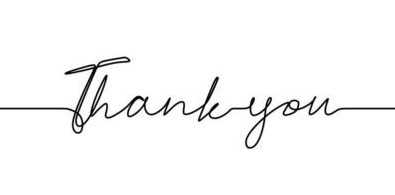    

</div>

---

---